In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib

import pandas as pd
import numpy as np
import seaborn as sns
import itertools

import sys
sys.path.append('../data/tecantaloupe/')

from growth.plate_spec import PlateSpec
from growth.plate_time_course_parser import SavageLabM1000Excel
from matplotlib import pyplot as plt

import seaborn as sns
from utils import *
import os

matplotlib.rcParams.update({'font.size': 30})

In [111]:
names = [('BW+sfGFP_AL7', 'BW+sfGFP pH7'),
 ('CAF+sfGFP_BL7', 'CAF+sfGFP pH7'),
 ('CAF+HCA_CL7', 'CAF+HCA pH7'),
 ('CAF+SbtA_DL7', 'CAF+SbtA pH7'),
 ('CAF+DAB2wt_EL7', 'CAF+DAB2wt pH7'),
 ('CAF+DAB1wt_FL7', 'CAF+DAB1wt pH7'),
 ('BW+sfGFP_AL5', 'BW+sfGFP pH5'),
 ('CAF+sfGFP_BL5', 'CAF+sfGFP pH5'),
 ('CAF+HCA_CL5', 'CAF+HCA pH5'),
 ('CAF+SbtA_DL5', 'CAF+SbtA pH5'),
 ('CAF+DAB2wt_EL5', 'CAF+DAB2wt pH5'),
 ('CAF+DAB1wt_FL5', 'CAF+DAB1wt pH5')]
list(zip(*names))

[('BW+sfGFP_AL7',
  'CAF+sfGFP_BL7',
  'CAF+HCA_CL7',
  'CAF+SbtA_DL7',
  'CAF+DAB2wt_EL7',
  'CAF+DAB1wt_FL7',
  'BW+sfGFP_AL5',
  'CAF+sfGFP_BL5',
  'CAF+HCA_CL5',
  'CAF+SbtA_DL5',
  'CAF+DAB2wt_EL5',
  'CAF+DAB1wt_FL5'),
 ('BW+sfGFP pH7',
  'CAF+sfGFP pH7',
  'CAF+HCA pH7',
  'CAF+SbtA pH7',
  'CAF+DAB2wt pH7',
  'CAF+DAB1wt pH7',
  'BW+sfGFP pH5',
  'CAF+sfGFP pH5',
  'CAF+HCA pH5',
  'CAF+SbtA pH5',
  'CAF+DAB2wt pH5',
  'CAF+DAB1wt pH5')]

10.367976785294594
pval for comparison of CAF+DAB2wt_EL7 and CAF+SbtA_DL7 is: 5.86E-03


/usr/local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/usr/local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/usr/local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/usr/local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is dep

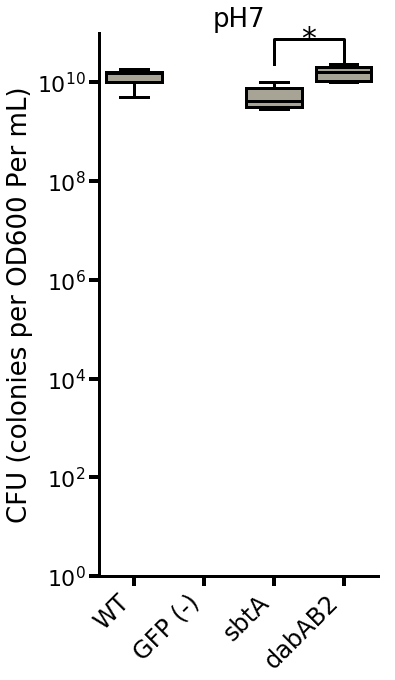

In [142]:
pathToData = '../data/2019_03_01_spottingForpH/'
filename = '2019_03_01_spottingForpHLB.xlsx'
inputFile = pathToData +filename
rawCounts = pd.read_excel(inputFile,sheet_name='ForAnalysis')
cols=rawCounts.columns
processedCounts = pd.DataFrame()
processedCounts['Strain']=rawCounts['Strain']
# processedCounts['replicate']=rawCounts['replicate']
for col in cols:
    if 'replicate' in col:
        rawCounts[col]=rawCounts[col].astype('float')
        processedCounts[col.rsplit('(')[0]+'(CFU/OD*ml)'] = rawCounts[col]*5*1000/3
processedCounts = processedCounts.dropna(thresh=2,axis=0)

names = [('BW+sfGFP_AL7', 'WT'),
 ('CAF+sfGFP_BL7', 'GFP (-)'),
#  ('CAF+HCA_CL7', 'CAF+HCA pH7'),
 ('CAF+SbtA_DL7', 'sbtA'),
 ('CAF+DAB2wt_EL7', 'dabAB2'),
#  ('CAF+DAB1wt_FL7', 'CAF+DAB1wt pH7'),
#  ('BW+sfGFP_AL5', 'BW+sfGFP pH5'),
#  ('CAF+sfGFP_BL5', 'CAF+sfGFP pH5'),
#  ('CAF+HCA_CL5', 'CAF+HCA pH5'),
#  ('CAF+SbtA_DL5', 'CAF+SbtA pH5'),
#  ('CAF+DAB2wt_EL5', 'CAF+DAB2wt pH5'),
#  ('CAF+DAB1wt_FL5', 'CAF+DAB1wt pH5')
        ]


order,labels=[list(x) for x in zip(*names)]

molten = processedCounts.melt(id_vars='Strain')
molten['value']=molten['value']


byStrain = molten.set_index('Strain')
byStrain = byStrain.loc[order]
byStrain['value']=byStrain['value']#+2
fig,ax = plt.subplots(figsize=(5,10))
# sns.swarmplot(x='Strain',y='value',data=molten,size=5,color='k',ax=ax)
sns.boxplot(x=byStrain.index,y='value',data=byStrain,ax=ax,color=greyish,saturation=1,linewidth=3)

for i,artist in enumerate(ax.artists):
    # Set the linecolor on the artist to the facecolor, and set the facecolor to None
    col ='k'
    artist.set_edgecolor(col)

    # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same colour as above
    for j in range(i*6,i*6+6):
        line = ax.lines[j]
        line.set_color(col)
        line.set_mfc(col)
        line.set_mec(col)

        
to_test = [
    ('CAF+DAB2wt_EL7','CAF+SbtA_DL7', 3,2),
#     ('CAF+DAB1wt_FL7','CAF+SbtA_DL7', 4,2),
#     ('CAF+DAB2wt_EL5','CAF+SbtA_DL5', 7,6),
#     ('CAF+DAB1wt_FL5','CAF+SbtA_DL5', 11,9),
]
        
# print(grouped_yld)
i=5
for test1,test2,x1,x2 in to_test:
    i=i%(5*3.1*3.1-5)
    group1 = byStrain.loc[test1]['value'].dropna()
    group2 = byStrain.loc[test2]['value'].dropna()
    y=max(max(group1),max(group2))#,ylds[x2]+stds[x2])
    print(np.log10(y))
#     offs = np.logspace(np.log10(y),12.2,num=len(to_test))
#     print(offs)
#     h=offs[i-1]
    h=i*10**10
#     print(grouped_yld.get_group(test[0])['yield'])
    tval,pval = ttest_ind(group1,group2,equal_var=False)
    pval_corrected=pval*len(to_test)
#     print(pval)
    print('pval for comparison of %s and %s is: %.2E'%(test1,test2,pval_corrected))
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=3, color='k')
    
    sig_str=''
    va=''
    if (pval_corrected<0.0005):
        sig_str='**'
        va='center'
    elif (pval_corrected<0.05):
        sig_str='*'
        va='center'
    else:
        sig_str='n.s.'
        va='bottom'
    
    plt.text((x1+x2)*.5, y+h, sig_str, ha='center', va=va, color='k',fontsize=30)
    i=i*3.1     
        
        
        
plt.ylabel('CFU (colonies per OD600 Per mL)', fontsize=26)

xs=range(0,len(labels))
plt.xticks(xs, labels, rotation=45, fontsize=24, ha='right')
plt.tick_params(axis='both', direction='out', bottom='on', left='on', top='off', right='off',
                length=10, width=4)
plt.yticks(fontsize=22)
plt.yscale('log')
ax.set_ylim([1,1e11])

plt.title('pH7', fontsize=26)
plt.xlabel('')

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

#     change axis weight
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
plt.savefig('fig4/fig4F1CFU_boxplot.eps',format='eps',bbox_inches='tight')

plt.show()

10.066946789630613
pval for comparison of CAF+DAB2wt_EL5 and CAF+SbtA_DL5 is: 3.20E-03


/usr/local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/usr/local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/usr/local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/usr/local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is dep

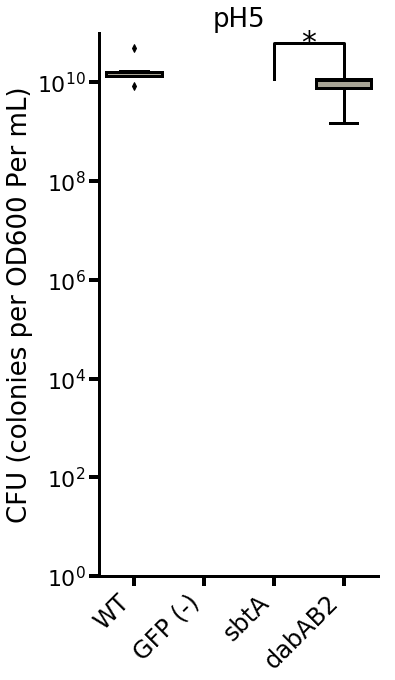

In [141]:
pathToData = '../data/2019_03_01_spottingForpH/'
filename = '2019_03_01_spottingForpHLB.xlsx'
inputFile = pathToData +filename
rawCounts = pd.read_excel(inputFile,sheet_name='ForAnalysis')
cols=rawCounts.columns
processedCounts = pd.DataFrame()
processedCounts['Strain']=rawCounts['Strain']
# processedCounts['replicate']=rawCounts['replicate']
for col in cols:
    if 'replicate' in col:
        rawCounts[col]=rawCounts[col].astype('float')
        processedCounts[col.rsplit('(')[0]+'(CFU/OD*ml)'] = rawCounts[col]*5*1000/3
processedCounts = processedCounts.dropna(thresh=2,axis=0)

names = [
#     ('BW+sfGFP_AL7', 'BW+sfGFP pH7'),
#  ('CAF+sfGFP_BL7', 'CAF+sfGFP pH7'),
# #  ('CAF+HCA_CL7', 'CAF+HCA pH7'),
#  ('CAF+SbtA_DL7', 'CAF+SbtA pH7'),
#  ('CAF+DAB2wt_EL7', 'CAF+DAB2wt pH7'),
# #  ('CAF+DAB1wt_FL7', 'CAF+DAB1wt pH7'),
 ('BW+sfGFP_AL5', 'WT'),
 ('CAF+sfGFP_BL5', 'GFP (-)'),
#  ('CAF+HCA_CL5', 'CAF+HCA pH5'),
 ('CAF+SbtA_DL5', 'sbtA'),
 ('CAF+DAB2wt_EL5', 'dabAB2'),
#  ('CAF+DAB1wt_FL5', 'CAF+DAB1wt pH5')
        ]


order,labels=[list(x) for x in zip(*names)]

molten = processedCounts.melt(id_vars='Strain')
molten['value']=molten['value']


byStrain = molten.set_index('Strain')
byStrain = byStrain.loc[order]
byStrain['value']=byStrain['value']#+2
fig,ax = plt.subplots(figsize=(5,10))
# sns.swarmplot(x='Strain',y='value',data=molten,size=5,color='k',ax=ax)
sns.boxplot(x=byStrain.index,y='value',data=byStrain,ax=ax,color=greyish,saturation=1,linewidth=3)

for i,artist in enumerate(ax.artists):
    # Set the linecolor on the artist to the facecolor, and set the facecolor to None
    col ='k'
    artist.set_edgecolor(col)

    # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same colour as above
    for j in range(i*6,i*6+6):
        line = ax.lines[j]
        line.set_color(col)
        line.set_mfc(col)
        line.set_mec(col)

        
to_test = [
#     ('CAF+DAB2wt_EL7','CAF+SbtA_DL7', 3,2),
#     ('CAF+DAB1wt_FL7','CAF+SbtA_DL7', 4,2),
    ('CAF+DAB2wt_EL5','CAF+SbtA_DL5', 3,2),
#     ('CAF+DAB1wt_FL5','CAF+SbtA_DL5', 11,9),
]
        
# print(grouped_yld)
i=5
for test1,test2,x1,x2 in to_test:
    i=i%(5*3.1*3.1-5)
    group1 = byStrain.loc[test1]['value'].dropna()
    group2 = byStrain.loc[test2]['value'].dropna()
    y=max(max(group1),max(group2))#,ylds[x2]+stds[x2])
    print(np.log10(y))
#     offs = np.logspace(np.log10(y),12.2,num=len(to_test))
#     print(offs)
#     h=offs[i-1]
    h=i*10**10
#     print(grouped_yld.get_group(test[0])['yield'])
    tval,pval = ttest_ind(group1,group2,equal_var=False)
    pval_corrected=pval*len(to_test)
#     print(pval)
    print('pval for comparison of %s and %s is: %.2E'%(test1,test2,pval_corrected))
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=3, color='k')
    
    sig_str=''
    va=''
    if (pval_corrected<0.0005):
        sig_str='**'
        va='center'
    elif (pval_corrected<0.05):
        sig_str='*'
        va='center'
    else:
        sig_str='n.s.'
        va='bottom'
    
    plt.text((x1+x2)*.5, y+h, sig_str, ha='center', va=va, color='k',fontsize=30)
    i=i*3.1     
        
        
        
plt.ylabel('CFU (colonies per OD600 Per mL)', fontsize=26)

xs=range(0,len(labels))
plt.xticks(xs, labels, rotation=45, fontsize=24, ha='right')
plt.tick_params(axis='both', direction='out', bottom='on', left='on', top='off', right='off',
                length=10, width=4)
plt.yticks(fontsize=22)
plt.yscale('log')
ax.set_ylim([1,1e11])

plt.title('pH5', fontsize=26)
plt.xlabel('')
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

#     change axis weight
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
plt.savefig('fig4/fig4F2CFU_boxplot.eps',format='eps',bbox_inches='tight')
plt.show()

9.920818753952375
pval for comparison of CAF+DAB2wt_EL7 and CAF+SbtA_DL7 is: 7.64E-06
10.221848749616356
pval for comparison of CAF+DAB1wt_FL7 and CAF+SbtA_DL7 is: 3.54E-01
9.920818753952375
pval for comparison of CAF+DAB2wt_EL5 and CAF+SbtA_DL5 is: 4.92E-02
9.263241434774582
pval for comparison of CAF+DAB1wt_FL5 and CAF+SbtA_DL5 is: 4.35E-02


/usr/local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/usr/local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/usr/local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/usr/local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is dep

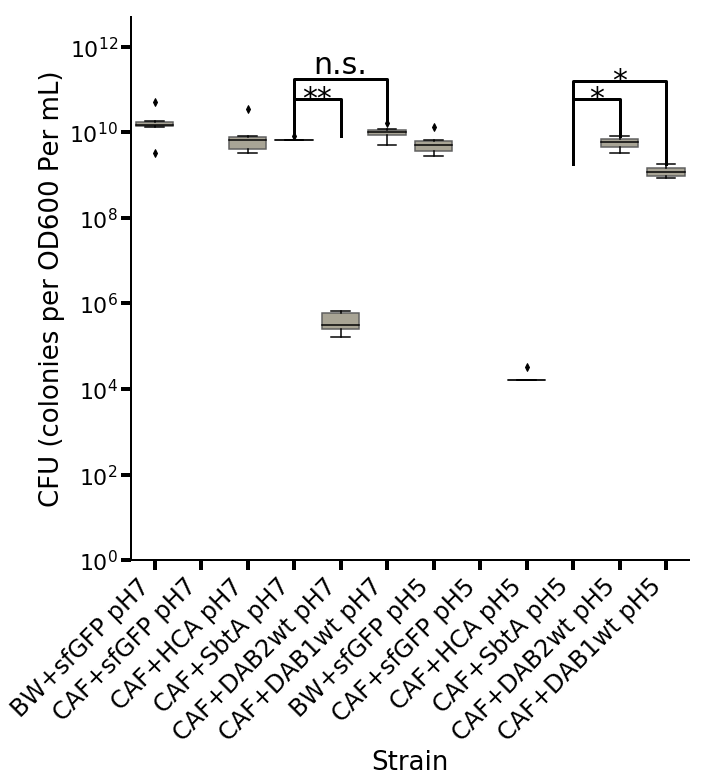

In [134]:
pathToData = '../data/2019_03_01_spottingForpH/'
filename = '2019_03_02_spottingForpHm9.xlsx'
inputFile = pathToData +filename
rawCounts = pd.read_excel(inputFile,sheet_name='ForAnalysis')
cols=rawCounts.columns
processedCounts = pd.DataFrame()
processedCounts['Strain']=rawCounts['Strain']
# processedCounts['replicate']=rawCounts['replicate']
for col in cols:
    if 'replicate' in col:
        rawCounts[col]=rawCounts[col].astype('float')
        processedCounts[col.rsplit('(')[0]+'(CFU/OD*ml)'] = rawCounts[col]*5*1000/3
processedCounts = processedCounts.dropna(thresh=2,axis=0)

order=[
    'BW+sfGFP_AL7',
    'CAF+sfGFP_BL7',
    'CAF+HCA_CL7',
    'CAF+SbtA_DL7',
    'CAF+DAB2wt_EL7',
    'CAF+DAB1wt_FL7',
    
    'BW+sfGFP_AL5',
    'CAF+sfGFP_BL5',
    'CAF+HCA_CL5',
    'CAF+SbtA_DL5',
    'CAF+DAB2wt_EL5',
    'CAF+DAB1wt_FL5',
 ]

labels=[
    'BW+sfGFP pH7',
    'CAF+sfGFP pH7',
    'CAF+HCA pH7',
    'CAF+SbtA pH7',
    'CAF+DAB2wt pH7',
    'CAF+DAB1wt pH7',
    
    'BW+sfGFP pH5',
    'CAF+sfGFP pH5',
    'CAF+HCA pH5',
    'CAF+SbtA pH5',
    'CAF+DAB2wt pH5',
    'CAF+DAB1wt pH5',
 ]

molten = processedCounts.melt(id_vars='Strain')
molten['value']=molten['value']


byStrain = molten.set_index('Strain')
byStrain = byStrain.loc[order]
byStrain['value']=byStrain['value']#+2

fig,ax = plt.subplots(figsize=(10,10))
# sns.swarmplot(x='Strain',y='value',data=molten,size=5,color='k',ax=ax)
sns.boxplot(x=byStrain.index,y='value',data=byStrain,ax=ax,color=greyish,saturation=1)

for i,artist in enumerate(ax.artists):
    # Set the linecolor on the artist to the facecolor, and set the facecolor to None
    col ='k'

    # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same colour as above
    for j in range(i*6,i*6+6):
        line = ax.lines[j]
        line.set_color(col)
        line.set_mfc(col)
        line.set_mec(col)
# sns.swarmplot(x=byStrain.index,y='value',data=byStrain,ax=ax,color='k')
plt.ylabel('CFU (colonies per OD600 Per mL)', fontsize=26)

to_test = [
    ('CAF+DAB2wt_EL7','CAF+SbtA_DL7', 4,3),
    ('CAF+DAB1wt_FL7','CAF+SbtA_DL7', 5,3),
    ('CAF+DAB2wt_EL5','CAF+SbtA_DL5', 10,9),
    ('CAF+DAB1wt_FL5','CAF+SbtA_DL5', 11,9),
]
        
# print(grouped_yld)
i=5
for test1,test2,x1,x2 in to_test:
    i=i%(5*3.1*3.1-5)
    group1 = byStrain.loc[test1]['value'].dropna()
    group2 = byStrain.loc[test2]['value'].dropna()
    y=max(max(group1),max(group2))#,ylds[x2]+stds[x2])
    print(np.log10(y))
#     offs = np.logspace(np.log10(y),12.2,num=len(to_test))
#     print(offs)
#     h=offs[i-1]
    h=i*10**10
#     print(grouped_yld.get_group(test[0])['yield'])
    tval,pval = ttest_ind(group1,group2,equal_var=False)
    pval_corrected=pval*len(to_test)
#     print(pval)
    print('pval for comparison of %s and %s is: %.2E'%(test1,test2,pval_corrected))
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=3, color='k')
    
    sig_str=''
    va=''
    if (pval_corrected<0.0005):
        sig_str='**'
        va='center'
    elif (pval_corrected<0.05):
        sig_str='*'
        va='center'
    else:
        sig_str='n.s.'
        va='bottom'
    
    plt.text((x1+x2)*.5, y+h, sig_str, ha='center', va=va, color='k',fontsize=30)
    i=i*3.1   

xs=range(0,len(labels))
plt.xticks(xs, labels, rotation=45, fontsize=24, ha='right')
plt.tick_params(axis='both', direction='out', bottom='on', left='on', top='off', right='off',
                length=10, width=4)
plt.yticks(fontsize=22)
plt.yscale('log')
ax.set_ylim([1,5e12])

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

#     change axis weight
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

plt.show()